In [1]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting

h5_file_path = "/home/rebeccaz/Github/vampires_calibration/mcmc/results/720nm.h5"
txt_file_path = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/675-50nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"


# MCMC Chains, Corner Plot, Summary Statistics

Chain shape (nsteps, nwalkers, ndim): (200000, 28, 13)


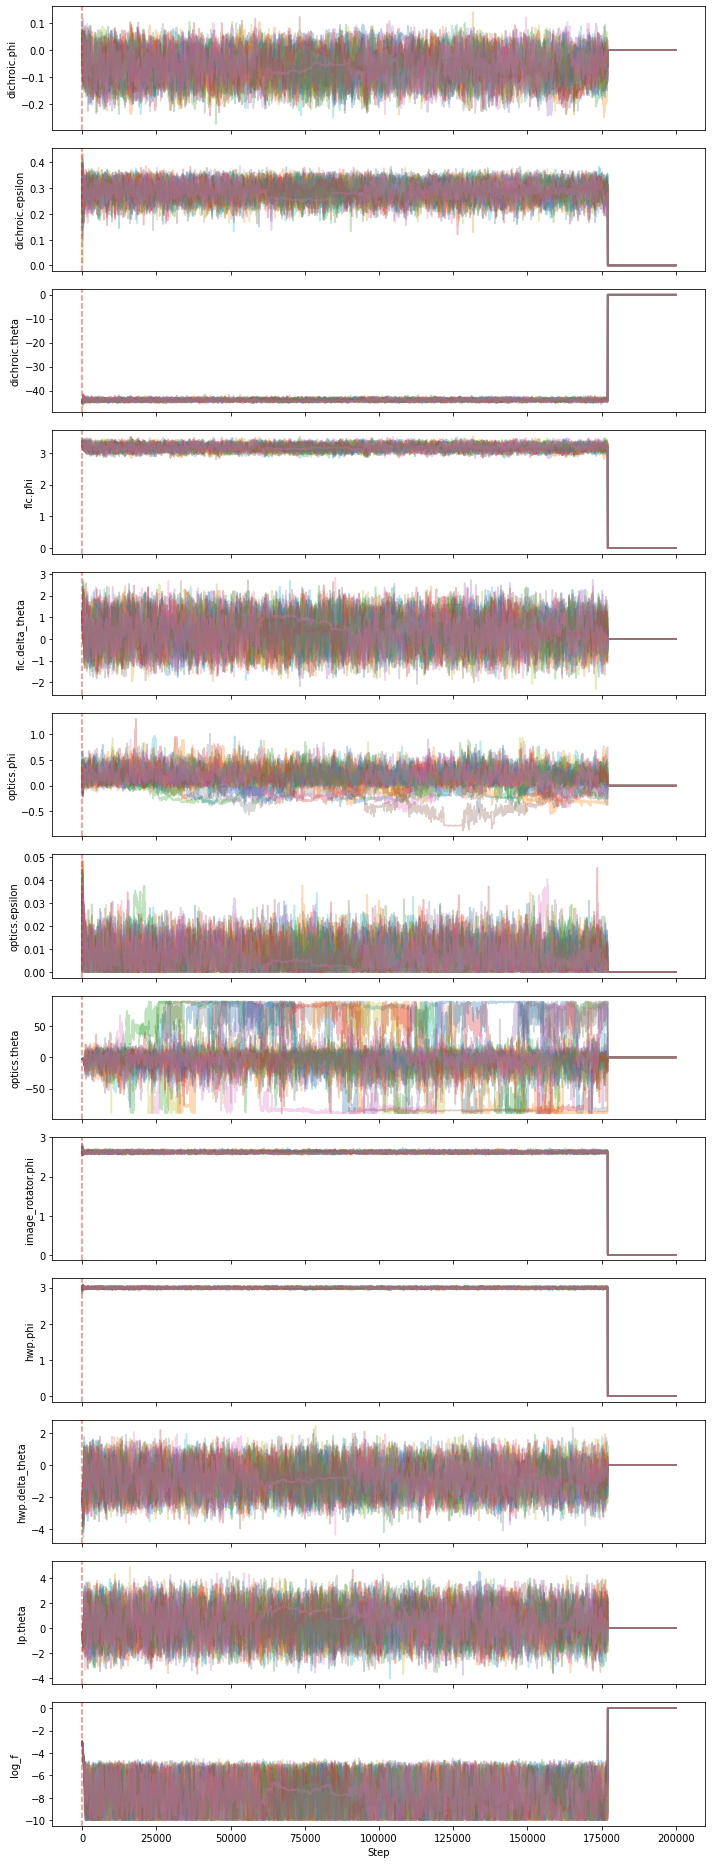

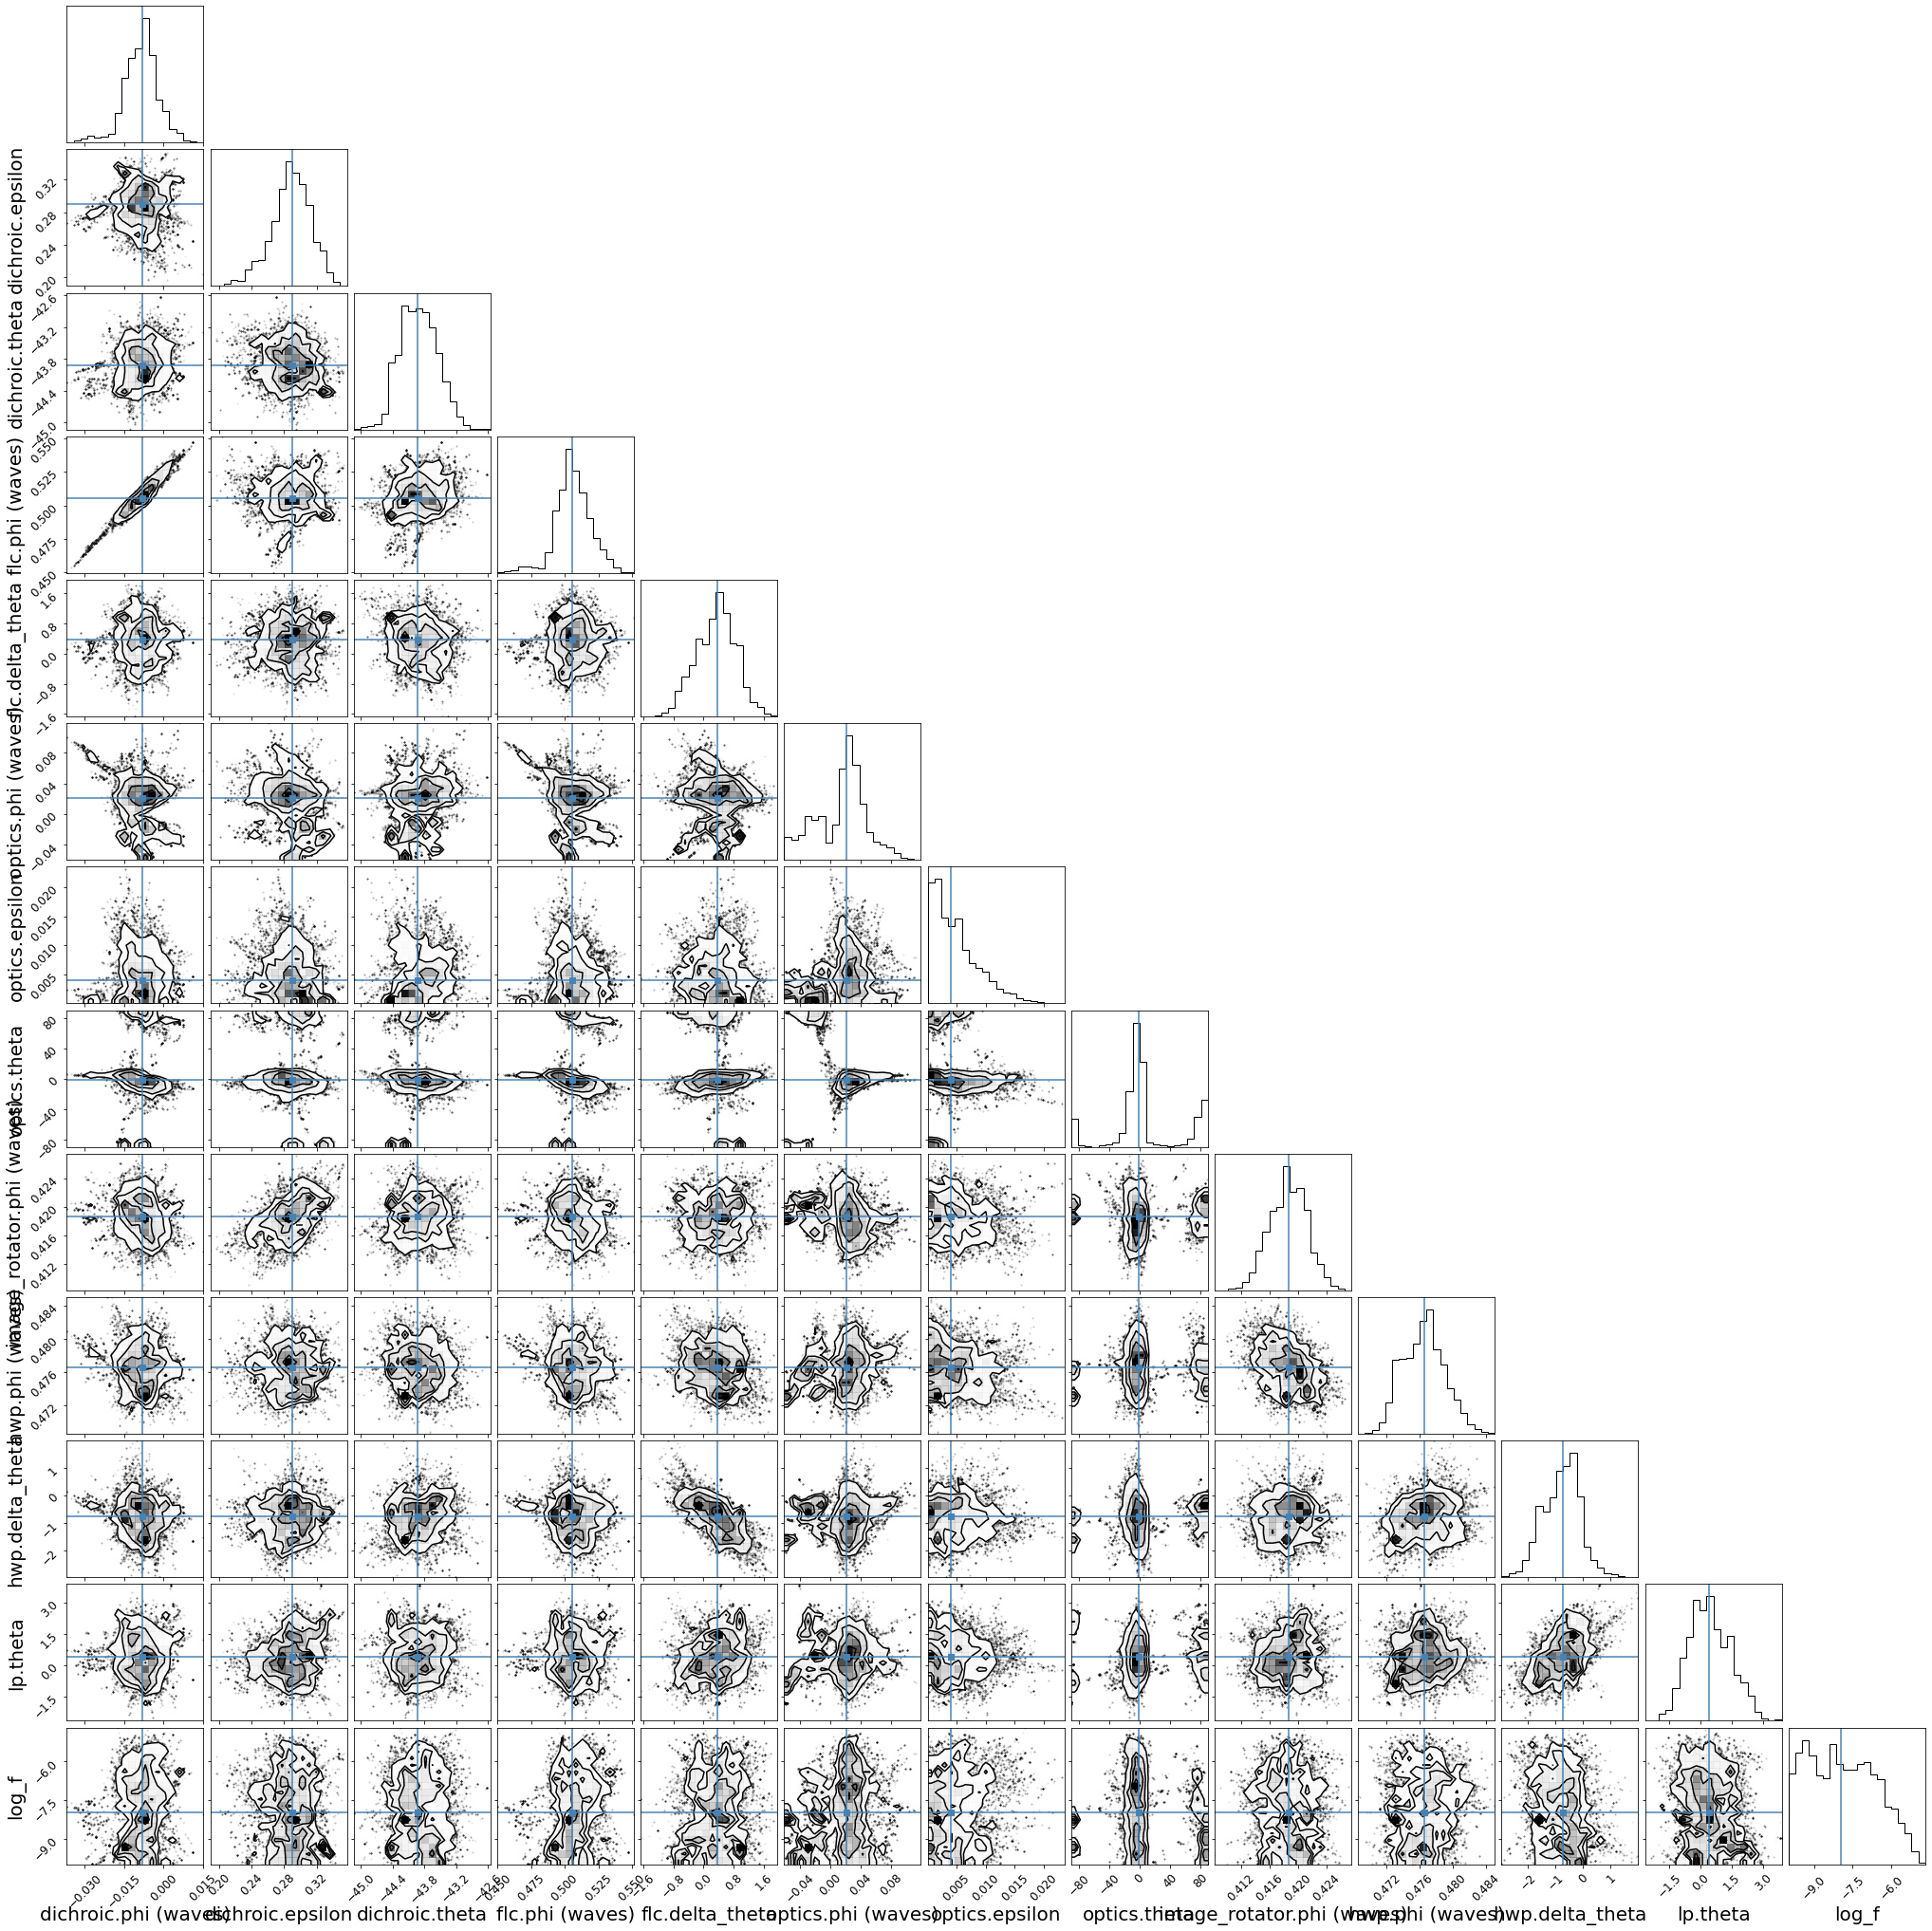

dichroic.phi (waves): -0.00814 ± 0.00664
dichroic.epsilon: 0.28961 ± 0.02434
dichroic.theta: -43.92899 ± 0.35213
flc.phi (waves): 0.50567 ± 0.01322
flc.delta_theta: 0.36453 ± 0.52332
optics.phi (waves): 0.02132 ± 0.03279
optics.epsilon: 0.00401 ± 0.00394
optics.theta: -1.51555 ± 43.99523
image_rotator.phi (waves): 0.41874 ± 0.00263
hwp.phi (waves): 0.47651 ± 0.00250
hwp.delta_theta: -0.73747 ± 0.66684
lp.theta: 0.37939 ± 0.99394
log_f: -7.97433 ± 1.28117


In [2]:
chain, names = plotting.load_chain_and_labels(h5_file_path, txt_file_path, include_logf = True)
all_step_range = (0, None)
corner_plot_step_range = (184000, 185000)

# Optional: Check chain shape after loading
print("Chain shape (nsteps, nwalkers, ndim):", chain.shape)

# Plot trace plots for MCMC chains
plotting.plot_trace(chain, names, step_range=all_step_range, max_walkers=100)

# Plot corner plot from flattened chain
plotting.plot_corner_flat(chain, names, step_range=corner_plot_step_range)

# Print median ± std for each parameter
plotting.summarize_posteriors(chain, names, step_range=corner_plot_step_range)


# Plotting Random Chains for Fitting 

In [7]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting
import numpy as np

all_step_range = (0, None)
corner_plot_step_range = (24000, 25000)

# Define the system configuration dictionary
system_dict = {
    "components": {
        "wollaston": {
            "type": "wollaston_prism_function",
            "properties": {"beam": "o", "transmission_ratio": 1.18},
        },
        "dichroic": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "flc": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "optics": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "image_rotator": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "hwp": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5, "theta": 0, "delta_theta": 0},
        },
        "lp": {
            "type": "general_linear_polarizer_function_with_theta",
            "properties": {"theta": 0},
        },
    }
}

# Input paths and call plotting function
h5_filename = "675nm_no_IMR_offset_with_dichroic.h5"
txt_filename = "675-50nm.txt"
csv_file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"

plotting.plot_mcmc_fits_double_diff_sum(
    h5_filename=h5_filename,
    txt_filename=txt_filename,
    csv_path=csv_file_path,
    filter_wavelength="675-50",
    system_dict=system_dict,
    wavelength_str="675nm",
    n_samples=50,
    step_range = all_step_range
)


IndexError: index 11 is out of bounds for axis 0 with size 11